In [1]:
import numpy as np
import matplotlib.pyplot as plt
import s2fft as s2f

In [2]:
import scipy.io
data_dict = scipy.io.loadmat('./EGM2008_Topography_flms_L0128.mat')
L = np.ravel(data_dict["L"])[0]
flm = data_dict["flm"]

In [3]:
L = 32

In [4]:
sampling = "mw"
f = s2f.transform.inverse_sov_fft(flm, L, spin=0, sampling=sampling)
f = np.fliplr(f)

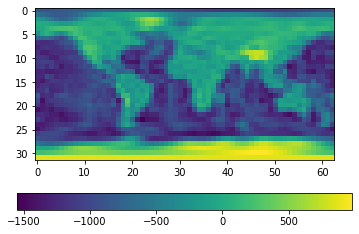

In [5]:
plt.imshow(np.real(f))
plt.colorbar(orientation="horizontal")

In [6]:
f_ext = s2f.resampling.periodic_extension_mw(f, L)

In [7]:
f_ext.shape

(63, 63)

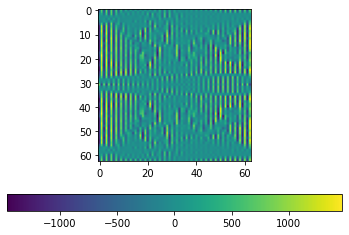

In [8]:
plt.imshow(np.real(f_ext))
plt.colorbar(orientation="horizontal")

In [9]:
f_ext = s2f.resampling.periodic_extension_mw_2(f, L)

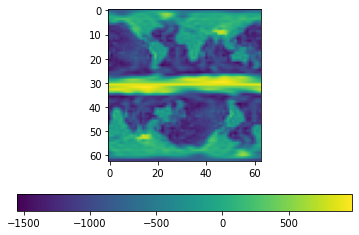

In [10]:
plt.imshow(np.real(f_ext))
plt.colorbar(orientation="horizontal")

In [15]:
f_ext_3 = np.zeros_like(f_ext)
ntheta = s2f.sampling.ntheta(L, sampling="mw")
nphi = s2f.sampling.nphi_equiang(L, sampling="mw")
ntheta_ext = 2 * L - 1

f_ext_3[0:ntheta, 0:nphi] = f[0:ntheta, 0:nphi]
f_ext_3[ntheta:, 0:nphi] = f[0:ntheta-1, 0:nphi]

plt.imshow(np.real(f_ext_3))
plt.colorbar(orientation="horizontal")

ValueError: could not broadcast input array from shape (31,63) into shape (0,63)